### KNN Classification_Zoo Data

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Reading Dataset
zoo = pd.read_csv(r'C:\Users\rayad\OneDrive\Documents\Data Science_Assignments\KNN\Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
## Splitting Data into X and Y Variables
X = zoo.iloc[:, 1:17]
Y = zoo['type']
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [6]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [7]:
## Splitting data for Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(70, 16)
(31, 16)


In [8]:
folds = KFold(n_splits=10)

In [9]:
neigbors = list(range(1,30))
params = dict(n_neighbors = neigbors)

In [12]:
## GridSearch to find the Optimal K value
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid= params, cv=folds)
grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.9571428571428571
{'n_neighbors': 1}


In [11]:
## Model Building using KNN
model = KNeighborsClassifier(n_neighbors=1)
results_train = cross_val_score(model, X_train, Y_train, cv=folds)
results_train.mean()*100

95.71428571428571

In [14]:
## Fitting the model on Test Data 
model.fit(X_test, Y_test)
y_predict = model.predict(X_test)
y_predict

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2, 1,
       6, 6, 4, 7, 6, 1, 4, 1, 1], dtype=int64)

In [15]:
results_test = cross_val_score(model, X_test, Y_test, cv=folds)
results_test.mean()*100

86.66666666666666

In [25]:
## Evaluating the Model Accuracy
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



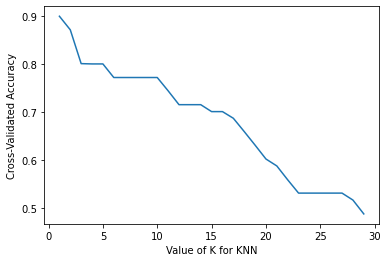

In [28]:
k_range = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=3)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

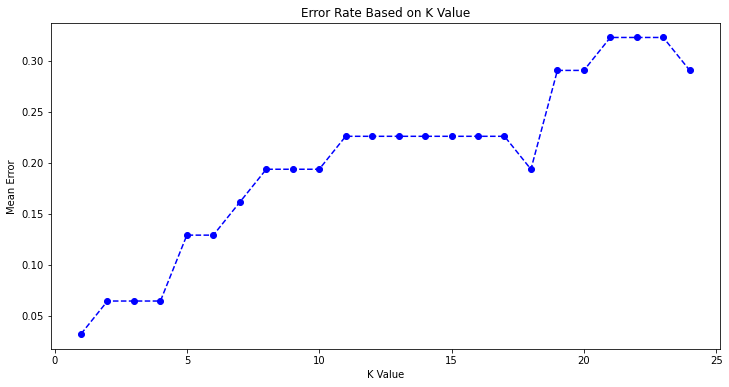

In [20]:
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error Rate Based on K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()